<a href="https://colab.research.google.com/github/dbarrau/TensorFlow_training/blob/main/05_computer_vision_and_CNN_in_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to computer vision and Convolutional Neural Networks in Tensorflow


Computer vision is the practice of writing algorithms wich can discover patterns invisual data. Such as the camera of a self-driving car recognizing the car in front.


Hyperparameter/Layer type | What does it do? | Typical values
--------------------------|------------------|---------------
Input image(s) | Target images we'd like to discover patterns in |Whatever we can take a photo of
Input layer | Takes in target images and preprocess them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]`
Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with `tf.keras.layers.ConvXD` (X can be multiple values)
Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU (`tf.keras.activations.relu`)
Pooling layer | Reduces the dimensionality of learned image features | Average (`tf.keras.layers.AvgPoo2D`) or Max (`tf.keras.layers.MaxPool2D`)
Fully connected layer | Further refines learned features from convolution layers | `tf.keras.layers.Dense()`
Output layer | Takes learned features and outputs them in a shape of target labels | `output_shape =  [number_of_classes]` (e.g. 3 for pizza, steak or sushi)
Output activation | Adds non-linearities to output layer | `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activations.softmax`


### Typical architecture of a CNN

```
# 1. Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)

cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3,3)
                         activation="relu,
                         input_shape=(224,224,3)), # (height, width color channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation="relu" == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid) # Binary activation output
])

# 2. Compile the model
cnn_model.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

# 3. fit the model
history = cnn_model.fit(train_data, epochs = 5)
```

### Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note -** We start with a smaller dataset so we can experiment quickly and figure out what wo(or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-01 10:12:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.187.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  27.5MB/s    in 3.8s    

2022-07-01 10:12:57 (27.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



>**Note -** Looking at the file structure of pizza_steak folder, we can see how do we handle files on computer vision problems (or image classification). There are train and test folders containing subfolders with each category to classify. 

### Becoming one with the data

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project, this usually means visualizing many samples of your data


In [ ]:
!ls pizza_steak

test  train


In [ ]:
! ls pizza_steak/train/


pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul  1 10:12 .
drwxr-xr-x 1 root root 4096 Jul  1 10:12 ..
drwxr-xr-x 4 root root 4096 Jul  1 10:12 test
drwxr-xr-x 4 root root 4096 Jul  1 10:12 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programatically.

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class
  
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img =mpimg.imread(target_folder +  "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}") # show the shape of the image
  
  return img

['2247711.jpg']
Image shape: (384, 512, 3)


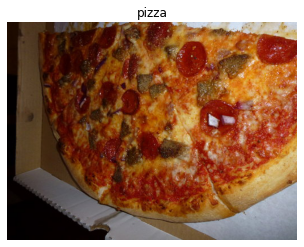

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
# show img file
img

array([[[ 27,   9,   0],
        [ 27,   9,   0],
        [ 27,   9,   0],
        ...,
        [207, 215, 226],
        [206, 216, 226],
        [207, 217, 227]],

       [[ 28,  10,   0],
        [ 28,  10,   0],
        [ 28,  10,   0],
        ...,
        [206, 214, 225],
        [204, 212, 223],
        [204, 212, 223]],

       [[ 29,  11,   0],
        [ 30,  12,   0],
        [ 30,  12,   0],
        ...,
        [202, 210, 223],
        [202, 210, 223],
        [205, 213, 226]],

       ...,

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [104, 113, 122],
        [102, 111, 120],
        [101, 110, 119]],

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [100, 109, 118],
        [ 99, 108, 117],
        [ 99, 108, 117]],

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [ 95, 104, 113],
        [ 96, 105, 114],
        [ 97, 106, 115]]

This looks totally like a tensor! let's convert it into one

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 27,   9,   0],
        [ 27,   9,   0],
        [ 27,   9,   0],
        ...,
        [207, 215, 226],
        [206, 216, 226],
        [207, 217, 227]],

       [[ 28,  10,   0],
        [ 28,  10,   0],
        [ 28,  10,   0],
        ...,
        [206, 214, 225],
        [204, 212, 223],
        [204, 212, 223]],

       [[ 29,  11,   0],
        [ 30,  12,   0],
        [ 30,  12,   0],
        ...,
        [202, 210, 223],
        [202, 210, 223],
        [205, 213, 226]],

       ...,

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [104, 113, 122],
        [102, 111, 120],
        [101, 110, 119]],

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [100, 109, 118],
        [ 99, 108, 117],
        [ 99, 108, 117]],

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [ 95, 104, 11

In [ ]:
# View image shape
img.shape # returns width, height, color channels

(384, 512, 3)

Remember to normalize our data! Neural networks like values between 0 and 1 

In [ ]:
# Get all the pizel values between 0 and 1
img/255.

array([[[0.10588235, 0.03529412, 0.        ],
        [0.10588235, 0.03529412, 0.        ],
        [0.10588235, 0.03529412, 0.        ],
        ...,
        [0.81176471, 0.84313725, 0.88627451],
        [0.80784314, 0.84705882, 0.88627451],
        [0.81176471, 0.85098039, 0.89019608]],

       [[0.10980392, 0.03921569, 0.        ],
        [0.10980392, 0.03921569, 0.        ],
        [0.10980392, 0.03921569, 0.        ],
        ...,
        [0.80784314, 0.83921569, 0.88235294],
        [0.8       , 0.83137255, 0.8745098 ],
        [0.8       , 0.83137255, 0.8745098 ]],

       [[0.11372549, 0.04313725, 0.        ],
        [0.11764706, 0.04705882, 0.        ],
        [0.11764706, 0.04705882, 0.        ],
        ...,
        [0.79215686, 0.82352941, 0.8745098 ],
        [0.79215686, 0.82352941, 0.8745098 ],
        [0.80392157, 0.83529412, 0.88627451]],

       ...,

       [[0.02352941, 0.        , 0.00784314],
        [0.02352941, 0.        , 0.00784314],
        [0.02352941, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specificaly:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile CNN 
* Fit CNN to our training data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)



Preprocess the data: Get all of the pixel values between 0 and 1 (also called scaling / normalization)

In [ ]:
# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to our data directory 
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 27s 191ms/step - loss: 0.5528 - accuracy: 0.7113 - val_loss: 0.4324 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4293 - accuracy: 0.8053 - val_loss: 0.3354 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.4304 - accuracy: 0.8113 - val_loss: 0.3271 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.3751 - accuracy: 0.8373 - val_loss: 0.3464 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 9s 181ms/step - loss: 0.3375 - accuracy: 0.8600 - val_loss: 0.2985 - val_accuracy: 0.8740


> **Note -** If the above cell is taking longer than app. 10 seconds per epoch, make sure we are using a GPU in Runtime -> change runtype -> GPU

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Trying a non-CNN model on our image data

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.91280&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model to replicate the Tensorflow Playground model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 174ms/step - loss: 1.0751 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 167ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 167ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Give a try: Compile another model with more layers, or more units per layer

In [ ]:
# 0. set random seed
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 172ms/step - loss: 5.4998 - accuracy: 0.6407 - val_loss: 1.6158 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 8s 166ms/step - loss: 1.3811 - accuracy: 0.6953 - val_loss: 1.0142 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 8s 166ms/step - loss: 1.0549 - accuracy: 0.7140 - val_loss: 3.2642 - val_accuracy: 0.5200
Epoch 4/5
47/47 [==============================] - 8s 165ms/step - loss: 0.8933 - accuracy: 0.7247 - val_loss: 0.4993 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6569 - accuracy: 0.7460 - val_loss: 0.4619 - val_accuracy: 0.7760


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model 2 and model 3 did terribly. We are getting closer to discover the power of convolutions! 

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Look at the difference! 15,063,101 trainable parameters for `model_3`  versus 31,101 for `model_1`

> **Note -** We can think of trainable parameters as **patterns a model can learn from data**. Intuitively, we might think more is better. and in lots of cases, it is. but in this case, the difference here is the two different styles of models we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable parameters, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.**  So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different features in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Pre-process the data (prepared it for our model, the main step here was scaling/normalizing, and turn the data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2458401.jpg']
Image shape: (307, 512, 3)
['3660716.jpg']
Image shape: (512, 512, 3)


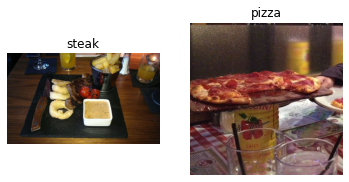

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data (prepare it for the model)

In [ ]:
# Define a directory dataset
train_dir ="pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn data into **batches**

A batch is a small subset of data. rather than look at all ~10.000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10.000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10.000 images in one hit could result in the model not being able to learn very well.

**Why 32?**

Because 32 is good for the model's health...

https://twitter.com/ylecun/status/989610208497360896?s=20

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data we're working with
                                               batch_size=32) # Size of minibatches to load data into (it is the right one)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next"batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that we setup when beginning a machine learning experiment and then we keep experimenting, we try to beat the baseline.

>**Note -** In deep learning, there is almost an infinite amount of architectures we could create. So one of the best ways to get started is to start with something simple and see if it works on our data and then introduce complexity as required (eg. Look at which current model is performing best in the field for your problem).


### Breakdown of Conv2D layer
</br>

Hyperparameter name | What does it do? | Typical values
--------------------|------------------|-----------
Filters | Decides how many filters shoud pass over an </br> input tensor (e.g. sliding window over an </br> image). | 10, 32, 64, (higher values lead to </br> more complex models)
Kernel size (also called filter size) | Determines the shape of the filters (sliding </br> window) over the output. | 3, 5, 7 (lower values learn smaller features, </br> higher values learn larger features)
Padding | Pads the target tensor with zeroes (if `"same"`) </br> to preserve input shape. Or leaves in the </br> target tensor as is (if `"valid"`), lowering </br> output shape. | `"same"` or `"valid"`
Strides | The number of steps a filter takes across an </br> image at a time (e.g. if `strides=1`, a filter </br>moves across an image 1 pixel at a time) | 1 (default), 2

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# 0. Set random seed
tf.random.set_seed(42)

# 1. Create the model (this will be the baseline)
model_4 = Sequential([
  Conv2D(filters=10, # Number of sliding windows going across an input 
         kernel_size=3, # Size of a sliding window going across an input
         strides=1, # steps of sliding window going across an input
         padding="same",# if "same", output shape is same as input shape, if "valid", output shape is compressed.
         activation="relu",
         input_shape=(224,224,3)), # input layer specifies input shape
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"), # Output layer (working with binary classification)
  Flatten(),
  Dense(1, activation="sigmoid")
])

# 2. Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 484000)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486,101
Trainable params: 486,101
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# 3. Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,)


Epoch 1/5
47/47 [==============================] - 10s 184ms/step - loss: 0.8112 - accuracy: 0.6900 - val_loss: 0.4781 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.4356 - accuracy: 0.8127 - val_loss: 0.3577 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.3614 - accuracy: 0.8500 - val_loss: 0.3344 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.2673 - accuracy: 0.8993 - val_loss: 0.3611 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.1526 - accuracy: 0.9627 - val_loss: 0.3383 - val_accuracy: 0.8580


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 123ms/step - loss: 0.2985 - accuracy: 0.8740


[0.2984640896320343, 0.8740000128746033]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 5. Evaluating our baseline model

It looks like our model is learning something, let's evaluate it!

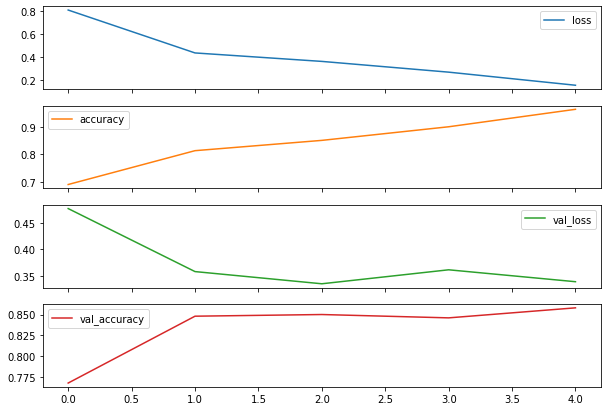

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7),subplots=True);

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs did we run for

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss");
  plt.plot(epochs, val_loss, label="val_loss");
  plt.title("loss");
  plt.xlabel("epochs");
  plt.legend();

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy");
  plt.plot(epochs, val_accuracy, label="val_accuracy");
  plt.title("accuracy");
  plt.legend();

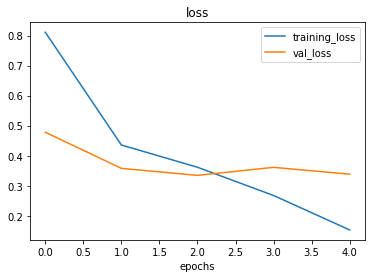

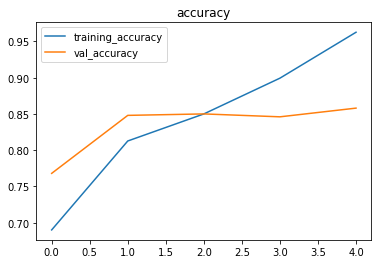

In [ ]:
# Checkout the loss and accuracy curve of model 4
plot_loss_curves(history_4)

>**Note -** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase number of conv layers
* Increase number of conv tilters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

>**NOte -** Reducing overfitting is also known as **regularization**.

In [ ]:
# Create the model (this is going to be our new baseline)

model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 0.6212 - accuracy: 0.6667 - val_loss: 0.4654 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.4779 - accuracy: 0.7767 - val_loss: 0.4677 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.4440 - accuracy: 0.8073 - val_loss: 0.3959 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.4067 - accuracy: 0.8167 - val_loss: 0.3474 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 8s 167ms/step - loss: 0.4044 - accuracy: 0.8187 - val_loss: 0.3454 - val_accuracy: 0.8480


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 484000)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486,101
Trainable params: 486,101
Non-trainable params: 0
_________________________________________________________________


**Despite model 5 has 8.861 trainable parameters, it still performed better than model 4, containing 486.101 trainable parameters**

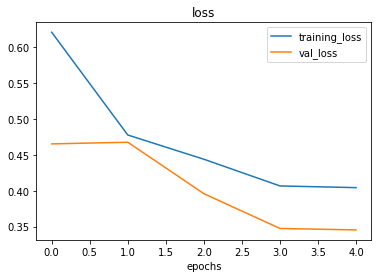

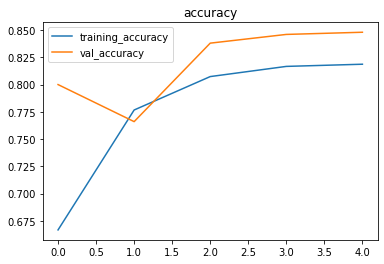

In [ ]:
plot_loss_curves(history_5)

### Data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **What is data augmentation? -** Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation

In [ ]:
# Import data and augment it from training directory
print("Augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Created non-augmented train data batches
print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False) # for demonstration purposes only

# Create non-augmented test data batch
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary") # for demonstration purposes only

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


> **Note -** The parameter shuffle is by default set to `True` to add randomness to the sampling

>**Note -** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but modified as they are loaded into the model


... And finally we'll visualize some augmented data...

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 12


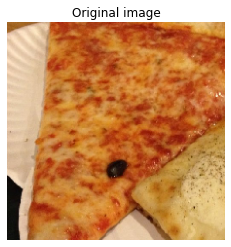

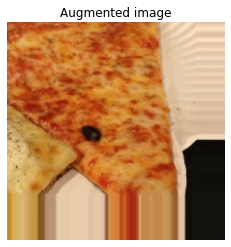

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # our batch sizes are 32...

print(f"showing image number: {random_number}")
plt.imshow(images[random_number]);
plt.title(f"Original image");
plt.axis(False);
plt.figure();
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

### Try a model like model 5 with augmented data

In [ ]:
# 0. Set up random seed
tf.random.set_seed(42)

# 1. Create model
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=(2,2)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=(2,2)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
  ])

In [ ]:
# 2. Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# 3. Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 440ms/step - loss: 0.7260 - accuracy: 0.4887 - val_loss: 0.6861 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 21s 438ms/step - loss: 0.6900 - accuracy: 0.5627 - val_loss: 0.6726 - val_accuracy: 0.5240
Epoch 3/5
47/47 [==============================] - 21s 437ms/step - loss: 0.6896 - accuracy: 0.5800 - val_loss: 0.6333 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 20s 435ms/step - loss: 0.6589 - accuracy: 0.6247 - val_loss: 0.5185 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 20s 435ms/step - loss: 0.6586 - accuracy: 0.6247 - val_loss: 0.5453 - val_accuracy: 0.7620


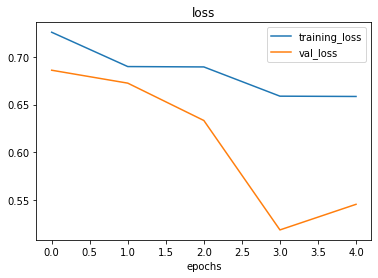

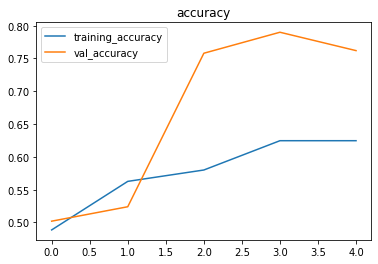

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

### Set up a model with augmented data and shuffled. 

Our model did not perform quite well, and we suspect it was because we did not shuffle from the image data generator.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

# Create non-augmented train data batches
print("Non-augmented traiing data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=True)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented traiing data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
# 0. set up random seed
tf.random.set_seed(42)

# 1. Create model
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# 3. Fit the model with augmented data
history_7 = model_7.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 9s 177ms/step - loss: 0.5790 - accuracy: 0.6960 - val_loss: 0.4534 - val_accuracy: 0.7920
Epoch 2/10
47/47 [==============================] - 8s 173ms/step - loss: 0.4820 - accuracy: 0.7707 - val_loss: 0.4034 - val_accuracy: 0.8440
Epoch 3/10
47/47 [==============================] - 8s 172ms/step - loss: 0.4258 - accuracy: 0.8053 - val_loss: 0.3367 - val_accuracy: 0.8660
Epoch 4/10
47/47 [==============================] - 8s 172ms/step - loss: 0.4046 - accuracy: 0.8227 - val_loss: 0.3487 - val_accuracy: 0.8600
Epoch 5/10
47/47 [==============================] - 8s 172ms/step - loss: 0.4019 - accuracy: 0.8253 - val_loss: 0.3124 - val_accuracy: 0.8700
Epoch 6/10
47/47 [==============================] - 8s 173ms/step - loss: 0.3556 - accuracy: 0.8513 - val_loss: 0.3052 - val_accuracy: 0.8900
Epoch 7/10
47/47 [==============================] - 8s 174ms/step - loss: 0.3496 - accuracy: 0.8513 - val_loss: 0.3503 - val_accuracy: 0.8460
Epoch 

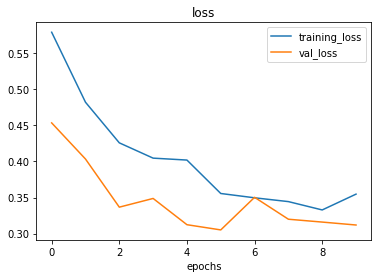

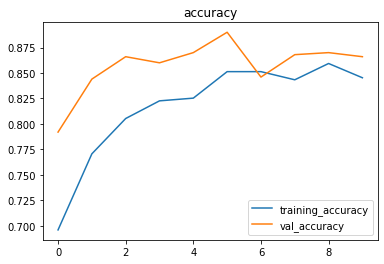

In [ ]:
plot_loss_curves(history_7)

>**Note -** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we have already beaten our baseline, there are a few thigns we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D()`/`MaxPool2D` layers)
* Increase the number of filters in each convolutionar layer (e.g. from 10 to 32, or even 64)
* Train for longer (more epochs)
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another model has learned and adjust it for our own use case

> **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on augmented shuffled training data.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True
                                                                   )
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=True)


# This is not done, but I code it anyways because it stays better
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")



Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Instantiate the model
model_8 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])



In [ ]:
# 3. Fit the model
history_8 = model_8.fit(train_data_augmented,
                        epochs=10,
                        validation_data=test_data,
                        steps_per_epoch=len(train_data_augmented),
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 22s 455ms/step - loss: 0.6276 - accuracy: 0.6500 - val_loss: 0.4318 - val_accuracy: 0.7860
Epoch 2/10
47/47 [==============================] - 21s 449ms/step - loss: 0.5007 - accuracy: 0.7627 - val_loss: 0.3899 - val_accuracy: 0.8440
Epoch 3/10
47/47 [==============================] - 21s 446ms/step - loss: 0.4435 - accuracy: 0.7933 - val_loss: 0.3921 - val_accuracy: 0.8280
Epoch 4/10
47/47 [==============================] - 21s 447ms/step - loss: 0.4643 - accuracy: 0.7947 - val_loss: 0.3050 - val_accuracy: 0.8740
Epoch 5/10
47/47 [==============================] - 21s 450ms/step - loss: 0.4452 - accuracy: 0.8007 - val_loss: 0.2961 - val_accuracy: 0.8780
Epoch 6/10
47/47 [==============================] - 21s 448ms/step - loss: 0.4070 - accuracy: 0.8280 - val_loss: 0.3315 - val_accuracy: 0.8800
Epoch 7/10
47/47 [==============================] - 21s 454ms/step - loss: 0.4507 - accuracy: 0.8027 - val_loss: 0.3158 - val_accuracy: 0.8800

### Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-07-01 10:23:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2022-07-01 10:23:37 (27.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



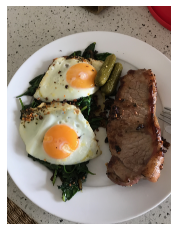

In [ ]:
import matplotlib.image as mpimg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak);
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

>**Note -** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model 7
def load_and_prep_image(filename, img_shape=224):
  """
    Reads an image from a filename, turns it into a tensor and reshapes it into (img_shape, img_shape, color_channels)
  """
  # Read in the image 
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale image (get all values between 0 and 1)
  img = img/255.

  return img



In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)
pred = model_7.predict(tf.expand_dims(steak, axis=0))

Looks like our custom image is being put though our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with the model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it 
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}");
  plt.axis(False);

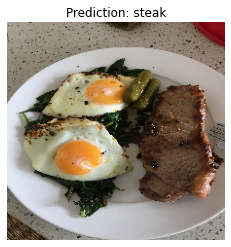

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time, pizza

--2022-07-01 10:23:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2022-07-01 10:23:39 (33.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



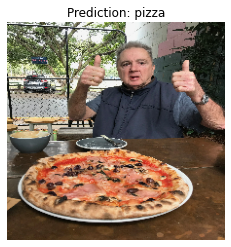

In [ ]:
# Download another test custom image and make a prediction on it 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizzas vs steak.). Now we're going to step things up a notch with 10 classes of food (multi-class classification)

Here are the steps we'll carry out:

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit hte model (overfit to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)


Remember the differences between a binary classification model and a multi-class classification model:

* datagen and augmentation need to be set to "categorical".
* 1 output neuron in binary classification versus n outputs corresponding to n categories.
* Activation function from the output layer needs to be set from sigmoid to softmax.
* Loss function compiling the model must be "Categorical Crossentropy" if target labels are one-hot encoded, or "Sparse Categorical Cross-entropy" if the labels are in integer form.


## 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-01 10:23:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.187.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  67.6MB/s    in 7.3s    

2022-07-01 10:23:48 (67.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} and {len(filenames)} images in '{dirpath}'.")

There are 2 and 0 images in '10_food_classes_all_data'.
There are 10 and 0 images in '10_food_classes_all_data/train'.
There are 0 and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 and 750 images in '10_food_classes_all_data/train/pizza'.
There are 10 and 0 images in '10_food_classes_all_data/test'.
There are 0 and 250 images in '10_food_classes_all_data/test/ice_cream'.
There ar

In [ ]:
# Setup the train and teset directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names 
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2738245.jpg']
Image shape: (512, 512, 3)


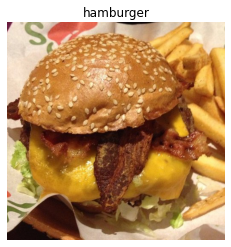

In [ ]:
# Visualize visualize visualize
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (get it ready for a model)

Image data generator is the tool to go when dealing with images to help us augment the data. We saw that augmenting the data leads to better model generalization. Important to remember, the augmented data does not affect the file content in the training and testing data.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
mclass_train_datagen_augmented = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator testing instance
mclass_test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import training and test data, augment training data.

# Training data
mclass_train_data = mclass_train_datagen_augmented.flow_from_directory(train_dir,
                                                                       target_size=(224,224),
                                                                       batch_size=32,
                                                                       class_mode="categorical") 

# Test data
mclass_test_data = mclass_test_datagen.flow_from_directory(test_dir,
                                                           target_size=(224,224),
                                                           batch_size=32,
                                                           class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline model)

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(10, activation="softmax")
])

In [ ]:
# 2. Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

### 4. Fit a model

In [ ]:
# 3. Fit the model
history_9 = model_9.fit(mclass_train_data,
                        epochs=5,
                        steps_per_epoch=len(mclass_train_data),
                        validation_data=mclass_test_data,
                        validation_steps=len(mclass_test_data))

Epoch 1/5
235/235 [==============================] - 42s 176ms/step - loss: 2.1940 - accuracy: 0.1852 - val_loss: 2.0723 - val_accuracy: 0.2368
Epoch 2/5
235/235 [==============================] - 40s 171ms/step - loss: 1.9815 - accuracy: 0.3049 - val_loss: 1.9426 - val_accuracy: 0.3084
Epoch 3/5
235/235 [==============================] - 40s 171ms/step - loss: 1.6540 - accuracy: 0.4435 - val_loss: 1.9414 - val_accuracy: 0.3388
Epoch 4/5
235/235 [==============================] - 40s 170ms/step - loss: 1.0637 - accuracy: 0.6455 - val_loss: 2.4607 - val_accuracy: 0.2960
Epoch 5/5
235/235 [==============================] - 40s 171ms/step - loss: 0.4786 - accuracy: 0.8499 - val_loss: 3.1960 - val_accuracy: 0.2952


### 5. Evaluate the model

In [ ]:
# Lets evaluate on the test data 
model_9.evaluate(mclass_test_data)

79/79 [==============================] - 10s 126ms/step - loss: 3.1960 - accuracy: 0.2952


[3.196016788482666, 0.295199990272522]

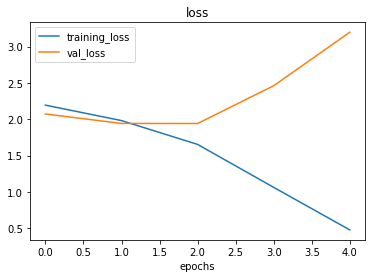

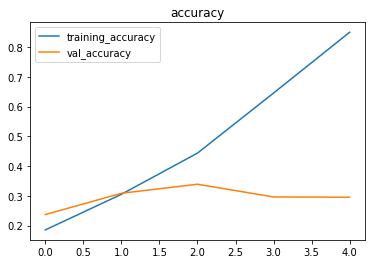

In [ ]:
# checkout loss curves
plot_loss_curves(history_9)

What do these loss curves tell us?
Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data. It's overfitting.
Let's try fix ovefitting by:

* **Get more data** - Having more data gives a model more opportunity to learn diverse patterns.
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers, or reduce # of hidden layer
* **Data augmentation** - Data augmentation manipulates the training data in such way to add more variability to it (without altering original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those pattenrs on your own dataset.

In [ ]:
# Let's try by removing one of each 2 stacked Conv2D layer

# 0. Set up random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

In [ ]:
# 2. Compile the model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])


In [ ]:
# 3. fit the model
history_10 = model_10.fit(mclass_train_data,
                          epochs=5,
                          steps_per_epoch=len(mclass_train_data),
                          validation_data=mclass_test_data,
                          validation_steps=len(mclass_test_data))

Epoch 1/5
235/235 [==============================] - 40s 170ms/step - loss: 2.0954 - accuracy: 0.2480 - val_loss: 1.9153 - val_accuracy: 0.3212
Epoch 2/5
235/235 [==============================] - 39s 168ms/step - loss: 1.7683 - accuracy: 0.4017 - val_loss: 1.8859 - val_accuracy: 0.3472
Epoch 3/5
235/235 [==============================] - 40s 172ms/step - loss: 1.4313 - accuracy: 0.5265 - val_loss: 1.9702 - val_accuracy: 0.3332
Epoch 4/5
235/235 [==============================] - 40s 169ms/step - loss: 0.9781 - accuracy: 0.6940 - val_loss: 2.1604 - val_accuracy: 0.3308
Epoch 5/5
235/235 [==============================] - 39s 168ms/step - loss: 0.5645 - accuracy: 0.8428 - val_loss: 2.5363 - val_accuracy: 0.3088


Looks like our "simplifying the model" experiment didn't work...  accuracy decreased and overfitting continued. Let's try data augmentation.

### Tyring to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closser)
* Improve validation accuracy

In [ ]:
# Instantiate image data generator with augmentation on rotation, shear_range, zoom_range, width_shift_range, height_shift_range and horizontal_flip.
mclass_train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                                    rotation_range=0.2,
                                                    zoom_range=0.2,
                                                    width_shift_range=0.2,
                                                    height_shift_range=0.2,
                                                    horizontal_flip=True)

# collecting training data
mclass_train_data_augmented = mclass_train_datagen_augmented.flow_from_directory(train_dir,
                                                                                 target_size=(224,224),
                                                                                 batch_size=32,
                                                                                 class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model, but this time we'll fit it on the augmented training data
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model using the same setup as previous models
model_11.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the models
history_11 = model_11.fit(mclass_train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(mclass_train_data_augmented),
                          validation_data=mclass_test_data,
                          validation_steps=len(mclass_test_data))

Epoch 1/10
235/235 [==============================] - 105s 447ms/step - loss: 2.2600 - accuracy: 0.1513 - val_loss: 2.1274 - val_accuracy: 0.2164
Epoch 2/10
235/235 [==============================] - 105s 446ms/step - loss: 2.1201 - accuracy: 0.2460 - val_loss: 2.0061 - val_accuracy: 0.2792
Epoch 3/10
235/235 [==============================] - 105s 447ms/step - loss: 2.0502 - accuracy: 0.2796 - val_loss: 1.9158 - val_accuracy: 0.3372
Epoch 4/10
235/235 [==============================] - 104s 444ms/step - loss: 2.0100 - accuracy: 0.2975 - val_loss: 1.9600 - val_accuracy: 0.3024
Epoch 5/10
235/235 [==============================] - 103s 440ms/step - loss: 1.9827 - accuracy: 0.3097 - val_loss: 1.9362 - val_accuracy: 0.3288
Epoch 6/10
235/235 [==============================] - 102s 436ms/step - loss: 1.9690 - accuracy: 0.3204 - val_loss: 1.8364 - val_accuracy: 0.3716
Epoch 7/10
235/235 [==============================] - 102s 434ms/step - loss: 1.9439 - accuracy: 0.3321 - val_loss: 1.8377 -

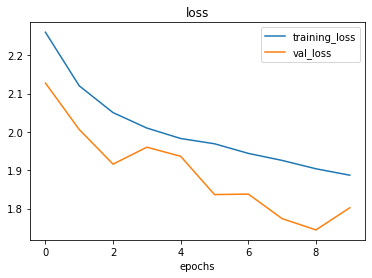

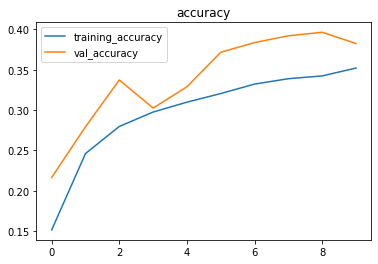

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_11)

That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction If we were to train for longer, we'd see better improvement.

### 7. Repeat until satisfied

Things we can do with the model to test:

* Train for longer
* play with activation functions
* restructure model architecthrue
* different methods of data augmentation (adjust thehyperparameters in our image data generator instance)


Run lots of experiments

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images.

In [ ]:
# Remind ourselves of the clases our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Reconfigure pred_and_plot function for multiclass
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with the model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it 
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  print(tf.argmax(pred))
  # Add in logic for multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  
  else:
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}");
  plt.axis(False);

In [ ]:
# Download some custom images 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-07-01 11:34:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.4’

03-pizza-dad.jpeg.4 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2022-07-01 11:34:50 (34.5 MB/s) - ‘03-pizza-dad.jpeg.4’ saved [2874848/2874848]

--2022-07-01 11:34:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awai

[[0.01237163 0.03888055 0.01686253 0.01227196 0.02261063 0.57899666
  0.02184166 0.00594161 0.04825801 0.24196483]]
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


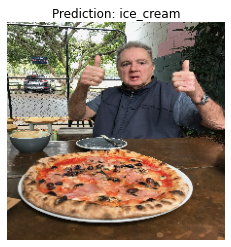

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_11,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

Our model did not perform well on our custom images, but this is because it only achieved ~39% accuracy on the test data. It is expected that it would perform poorly on unseen data.

In [ ]:
### Savaing and loading our model
model_11.save("saved_trained_model_11")

INFO:tensorflow:Assets written to: saved_trained_model_11/assets


In [ ]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")

In [ ]:
loaded_model_11.evaluate(mclass_test_data)

79/79 [==============================] - 10s 127ms/step - loss: 1.8020 - accuracy: 0.3824


[1.8020089864730835, 0.3824000060558319]

In [ ]:
# Compare our loaded model to our existing model
model_11.evaluate(mclass_test_data)

79/79 [==============================] - 10s 127ms/step - loss: 1.8020 - accuracy: 0.3824


[1.8020086288452148, 0.3824000060558319]